In [15]:
# load the data set using pandas
import pandas as pd
data=pd.read_csv('E:\Excelr-P269-Internship-Project-Group2-OIl-Price-Prediction-And-Forecasting-Using-Python\Dataset\Cleaned_Oil_Price.csv')
df=pd.DataFrame(data)

In [17]:
data

,Date,Price,Year
0,1987-05-20,18.630000,1987
1,1987-05-21,18.450000,1987
2,1987-05-22,18.550000,1987
3,1987-05-25,18.600000,1987
4,1987-05-26,18.630000,1987
...,...,...,...
14757,2023-07-17,74.150002,2023
14758,2023-07-18,75.750000,2023
14759,2023-07-19,75.349998,2023
14760,2023-07-20,75.629997,2023


: 

12:43:46 - cmdstanpy - INFO - Chain [1] start processing
12:43:59 - cmdstanpy - INFO - Chain [1] done processing


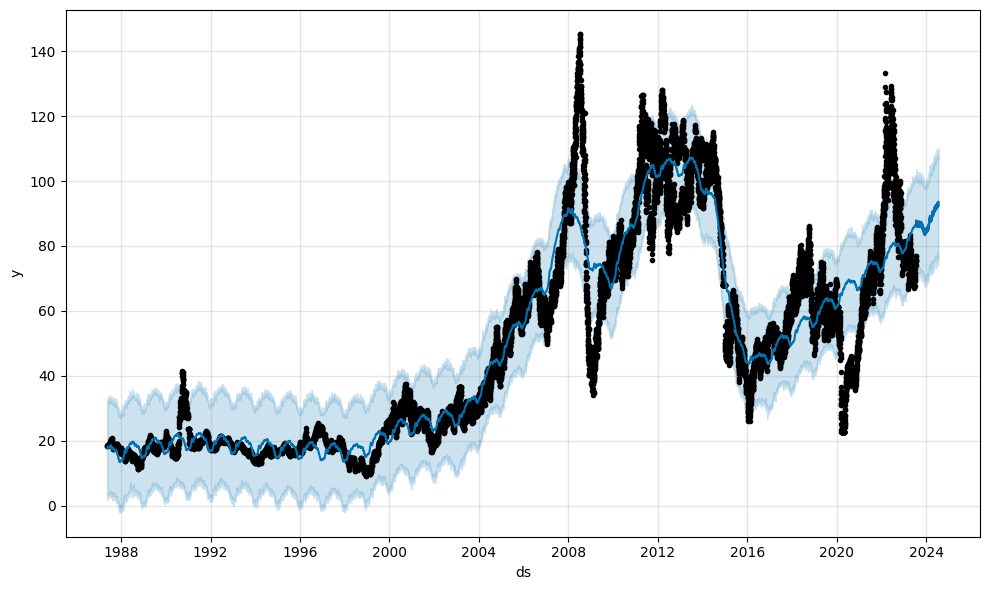

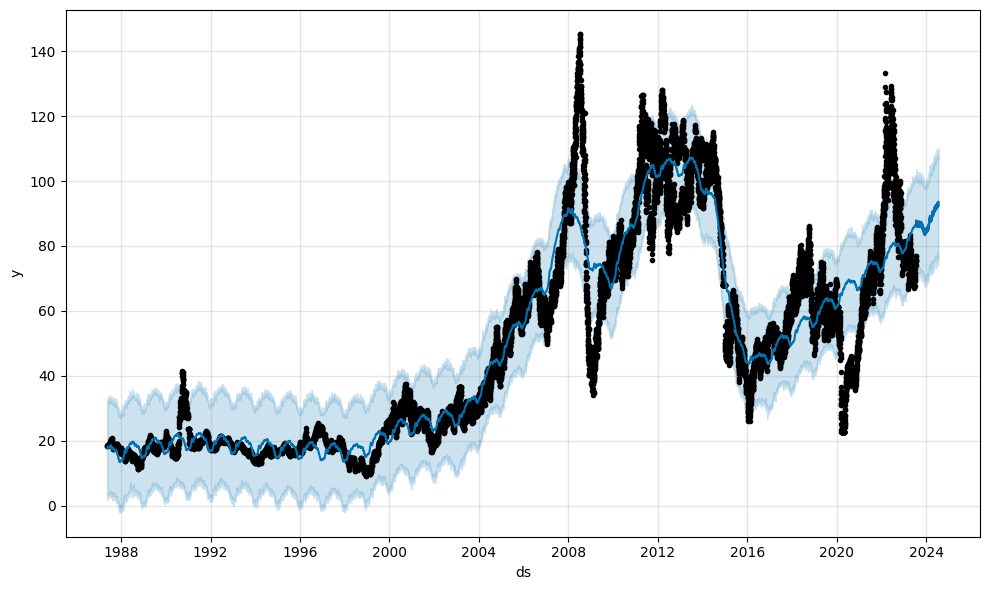

In [9]:
import pandas as pd
from prophet import Prophet

# Rename the columns to 'ds' and 'y' as required by Prophet
df.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)

# Create a Prophet model
model = Prophet()

# Fit the model to the data
model.fit(df)

# Create a dataframe for future dates to predict
future = model.make_future_dataframe(periods=365)

# Make predictions for the future dates
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)


In [13]:
import pandas as pd
from prophet import Prophet


# Rename the columns to 'ds' and 'y' as required by Prophet
df = df.rename(columns={'Date': 'ds', 'Price': 'y'})

# Create a Prophet model
model = Prophet()

# Fit the model to the data
model.fit(df)

# Get the date from the user
date = input('Enter a future date (YYYY-MM-DD): ')

# Create a dataframe for the future date to predict
future = pd.DataFrame({'ds': [date]})

# Make predictions for the future date
forecast = model.predict(future)

# Get the predicted price for the specified date
price = forecast.loc[0, 'yhat']

# Print the result
print(f'The predicted price on {date} is {price}')

12:47:11 - cmdstanpy - INFO - Chain [1] start processing
12:47:23 - cmdstanpy - INFO - Chain [1] done processing


The predicted price on 2025-11-12 is 96.11291249240807


In [ ]:
import pandas as pd
import pickle
from prophet import Prophet

# Load your dataset here
df = pd.read_csv('E:\Excelr-P269-Internship-Project-Group2-OIl-Price-Prediction-And-Forecasting-Using-Python\Dataset\IQR.csv')

# Rename the columns to 'ds' and 'y' as required by Prophet
df.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)

# Create a Prophet model
model = Prophet()

# Fit the model to the data
model.fit(df)

# Save the trained model to a pickle file
with open('E:\Excelr-P269-Internship-Project-Group2-OIl-Price-Prediction-And-Forecasting-Using-Python\Dataset\prophet_model_5k.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Rest of your code for making predictions and plotting the forecast
# ...

In [5]:
import pandas as pd
import pickle
from prophet import Prophet

# Load your dataset here
df = pd.read_csv('E:\Excelr-P269-Internship-Project-Group2-OIl-Price-Prediction-And-Forecasting-Using-Python\Dataset\Cleaned_Oil_Price.csv')

# Rename the columns to 'ds' and 'y' as required by Prophet
df.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)

# Create a Prophet model
model = Prophet()

# Fit the model to the data
model.fit(df)

# Save the trained model to a pickle file
with open('E:\Excelr-P269-Internship-Project-Group2-OIl-Price-Prediction-And-Forecasting-Using-Python\Dataset\prophet_model_11k.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Rest of your code for making predictions and plotting the forecast
# ...


13:51:40 - cmdstanpy - INFO - Chain [1] start processing
13:51:53 - cmdstanpy - INFO - Chain [1] done processing


Epoch 1/50
72/72 [==============================] - 3s 8ms/step - loss: 0.0559
Epoch 2/50
72/72 [==============================] - 1s 8ms/step - loss: 7.2455e-04
Epoch 3/50
72/72 [==============================] - 1s 8ms/step - loss: 4.2175e-04
Epoch 4/50
72/72 [==============================] - 1s 8ms/step - loss: 3.7671e-04
Epoch 5/50
72/72 [==============================] - 1s 8ms/step - loss: 3.6030e-04
Epoch 6/50
72/72 [==============================] - 1s 8ms/step - loss: 3.4383e-04
Epoch 7/50
72/72 [==============================] - 1s 7ms/step - loss: 3.3614e-04
Epoch 8/50
72/72 [==============================] - 0s 7ms/step - loss: 3.1263e-04
Epoch 9/50
72/72 [==============================] - 0s 7ms/step - loss: 3.0641e-04
Epoch 10/50
72/72 [==============================] - 1s 7ms/step - loss: 2.9480e-04
Epoch 11/50
72/72 [==============================] - 1s 7ms/step - loss: 2.7466e-04
Epoch 12/50
72/72 [==============================] - 1s 7ms/step - loss: 2.7273e-04
Epoch

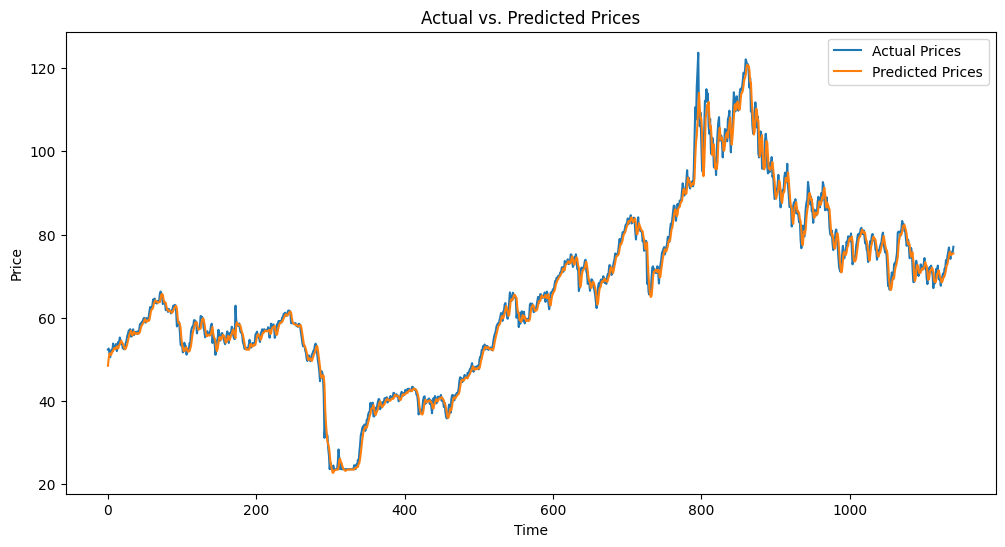

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load your time series data (replace with your dataset)
# Assuming the 'Date' column is available and sorted
data = pd.read_csv('E:\Excelr-P269-Internship-Project-Group2-OIl-Price-Prediction-And-Forecasting-Using-Python\Dataset\IQR.csv')
prices = data['Price'].values

# Normalize data
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))

# Split data into training and test sets
train_size = int(len(prices_scaled) * 0.8)
train_data = prices_scaled[:train_size]
test_data = prices_scaled[train_size:]

# Create sequences and targets for training
sequence_length = 10  # Adjust as needed
X_train, y_train = [], []
for i in range(len(train_data) - sequence_length):
    X_train.append(train_data[i:i + sequence_length])
    y_train.append(train_data[i + sequence_length])
X_train, y_train = np.array(X_train), np.array(y_train)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64)

# Predict on test data
X_test, y_test = [], []
for i in range(len(test_data) - sequence_length):
    X_test.append(test_data[i:i + sequence_length])
    y_test.append(test_data[i + sequence_length])
X_test, y_test = np.array(X_test), np.array(y_test)
predictions = model.predict(X_test)

# Inverse transform predictions and actual values
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_inv, predictions_inv)
print(f"Mean Squared Error: {mse:.2f}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Prices')
plt.plot(predictions_inv, label='Predicted Prices')
plt.legend()
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense

# Load your time series data (replace with your dataset)
# Assuming the 'Date' column is available and sorted
data = pd.read_csv('E:\Excelr-P269-Internship-Project-Group2-OIl-Price-Prediction-And-Forecasting-Using-Python\Dataset\Cleaned_Oil_price.csv')
prices = data['Price'].values

# Normalize data
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))

# Split data into training and test sets
train_size = int(len(prices_scaled) * 0.8)
train_data = prices_scaled[:train_size]
test_data = prices_scaled[train_size:]

# Create sequences and targets for training
sequence_length = 10  # Adjust as needed
X_train, y_train = [], []
for i in range(len(train_data) - sequence_length):
    X_train.append(train_data[i:i + sequence_length])
    y_train.append(train_data[i + sequence_length])
X_train, y_train = np.array(X_train), np.array(y_train)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64)

# Save the trained model
model.save('trained_lstm_model.h5')

# Load the trained model
loaded_model = load_model('trained_lstm_model.h5')

# Take user input date
user_input_date = pd.to_datetime('2023-08-10')  # Replace with user input

# Find the index of the user input date in the dataset
user_input_index = data[data['Date'] == user_input_date].index[0]

# Prepare input sequence for prediction
input_sequence = prices_scaled[user_input_index - sequence_length:user_input_index]
input_sequence = input_sequence.reshape(1, sequence_length, 1)

# Predict the price
predicted_scaled_price = loaded_model.predict(input_sequence)
predicted_price = scaler.inverse_transform(predicted_scaled_price)

print(f"Predicted Price on {user_input_date}: {predicted_price[0][0]:.2f}")


Epoch 1/50
185/185 [==============================] - 3s 7ms/step - loss: 0.0152
Epoch 2/50
185/185 [==============================] - 1s 7ms/step - loss: 3.3566e-04
Epoch 3/50
185/185 [==============================] - 1s 7ms/step - loss: 3.1857e-04
Epoch 4/50
185/185 [==============================] - 1s 7ms/step - loss: 2.9944e-04
Epoch 5/50
185/185 [==============================] - 1s 7ms/step - loss: 2.8184e-04
Epoch 6/50
185/185 [==============================] - 1s 7ms/step - loss: 2.6650e-04
Epoch 7/50
185/185 [==============================] - 1s 7ms/step - loss: 2.4198e-04
Epoch 8/50
185/185 [==============================] - 1s 7ms/step - loss: 2.3506e-04
Epoch 9/50
185/185 [==============================] - 1s 7ms/step - loss: 2.3059e-04
Epoch 10/50
185/185 [==============================] - 1s 7ms/step - loss: 2.1812e-04
Epoch 11/50
185/185 [==============================] - 1s 7ms/step - loss: 2.1399e-04
Epoch 12/50
185/185 [==============================] - 1s 7ms/step 

C:\Users\nazee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


IndexError: index 0 is out of bounds for axis 0 with size 0

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.wrappers.scikit_learn import KerasRegressor


ModuleNotFoundError: No module named 'keras.wrappers'

In [ ]:
def create_lstm_model(units=50):
    model = Sequential()
    model.add(LSTM(units, activation='relu', input_shape=(sequence_length, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model


In [ ]:
data = pd.read_csv('E:\Excelr-P269-Internship-Project-Group2-OIl-Price-Prediction-And-Forecasting-Using-Python\Dataset\Cleaned_Oil_price.csv')
prices = data['Price'].values

scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))

train_size = int(len(prices_scaled) * 0.8)
train_data = prices_scaled[:train_size]

sequence_length = 10

# Define the hyperparameters to search over
param_grid = {
    'units': [50, 100],  # Experiment with different values
    'batch_size': [32, 64],  # Experiment with different values
    'epochs': [50, 100]  # Experiment with different values
}


In [ ]:
lstm_model = KerasRegressor(build_fn=create_lstm_model, verbose=0)
grid = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=TimeSeriesSplit(n_splits=3), verbose=2)
grid_result = grid.fit(X_train, y_train)


In [ ]:
lstm_model = KerasRegressor(build_fn=create_lstm_model, verbose=0)
random = RandomizedSearchCV(estimator=lstm_model, param_distributions=param_grid, n_iter=10, cv=TimeSeriesSplit(n_splits=3), verbose=2)
random_result = random.fit(X_train, y_train)


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))


In [5]:
!pip  keras


Usage:   
  C:\Users\nazee\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip <command> [options]

no such option: --upgrade


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator
import tensorflow
import KerasRegressor

# Define your LSTM model as a function
def create_lstm_model(units=50):
    model = Sequential()
    model.add(LSTM(units, activation='relu', input_shape=(sequence_length, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Define a custom wrapper class for KerasRegressor
class KerasRegressorWrapper(KerasRegressor, BaseEstimator):
    def __init__(self, build_fn=create_lstm_model, **kwargs):
        super().__init__(build_fn=build_fn, **kwargs)

# Load and preprocess your data as before
data = pd.read_csv('E:\Excelr-P269-Internship-Project-Group2-OIl-Price-Prediction-And-Forecasting-Using-Python\Dataset\Cleaned_Oil_price.csv')
prices = data['Price'].values

scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))

train_size = int(len(prices_scaled) * 0.8)
train_data = prices_scaled[:train_size]

sequence_length = 10

# Define the hyperparameters and search space
param_grid = {
    'estimator__units': [50, 100],  # Experiment with different values
    'estimator__batch_size': [32, 64],  # Experiment with different values
    'estimator__epochs': [50, 100]  # Experiment with different values
}

# Create a pipeline with the KerasRegressor wrapper
lstm_model = KerasRegressorWrapper()
pipeline = Pipeline([('estimator', lstm_model)])

# Perform Grid Search
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=TimeSeriesSplit(n_splits=3), verbose=2)
grid_result = grid.fit(X_train, y_train)

# Perform Random Search
random = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, n_iter=10, cv=TimeSeriesSplit(n_splits=3), verbose=2)
random_result = random.fit(X_train, y_train)

# Print the best results
print("Best score with Grid Search: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best score with Random Search: %f using %s" % (random_result.best_score_, random_result.best_params_))


ModuleNotFoundError: No module named 'tf'

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load and preprocess your data as before
data = pd.read_csv('E:\Excelr-P269-Internship-Project-Group2-OIl-Price-Prediction-And-Forecasting-Using-Python\Dataset\Cleaned_Oil_price.csv')
prices = data['Price'].values

scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))

train_size = int(len(prices_scaled) * 0.8)
train_data = prices_scaled[:train_size]

sequence_length = 10

# Define the hyperparameters to search over
param_grid = {
    'units': [50, 100],  # Experiment with different values
    'batch_size': [32, 64],  # Experiment with different values
    'epochs': [50, 100]  # Experiment with different values
}

# Create sequences and targets for training as before
# Perform Grid Search
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=TimeSeriesSplit(n_splits=3), verbose=2)
grid_result = grid.fit(X_train, y_train)

# Perform Random Search
random = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, n_iter=10, cv=TimeSeriesSplit(n_splits=3), verbose=2)
random_result = random.fit(X_train, y_train)

# Loop through the hyperparameters and perform Grid Search
results = []
for units in param_grid['units']:
    for batch_size in param_grid['batch_size']:
        for epochs in param_grid['epochs']:
            model = Sequential()
            model.add(LSTM(units, activation='relu', input_shape=(sequence_length, 1)))
            model.add(Dense(1))
            model.compile(optimizer='adam', loss='mse')

            model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
            mse = model.evaluate(X_test, y_test)  # Assuming you have a separate test set
            results.append({'units': units, 'batch_size': batch_size, 'epochs': epochs, 'mse': mse})

# Find the best hyperparameters based on the lowest MSE
best_result = min(results, key=lambda x: x['mse'])
print("Best hyperparameters:", best_result)


NameError: name 'pipeline' is not defined

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load and preprocess your data as before
data = pd.read_csv('E:/Excelr-P269-Internship-Project-Group2-OIl-Price-Prediction-And-Forecasting-Using-Python/Dataset/Cleaned_Oil_price.csv')
prices = data['Price'].values

scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))

train_size = int(len(prices_scaled) * 0.8)
train_data = prices_scaled[:train_size]

sequence_length = 10

# Create sequences and targets for training
X_train, y_train = [], []
for i in range(len(train_data) - sequence_length):
    X_train.append(train_data[i:i + sequence_length])
    y_train.append(train_data[i + sequence_length])
X_train, y_train = np.array(X_train), np.array(y_train)


# Define the hyperparameters to search over
param_grid = {
    'units': [50, 100],  # Experiment with different values
    'batch_size': [32, 64],  # Experiment with different values
    'epochs': [50, 100]  # Experiment with different values
}

# Build the LSTM model function
def create_lstm_model(units=50):
    model = Sequential()
    model.add(LSTM(units, activation='relu', input_shape=(sequence_length, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Use TimeSeriesSplit as the cross-validation strategy
tscv = TimeSeriesSplit(n_splits=3)

# Create the GridSearchCV object with specified scoring
grid = GridSearchCV(estimator=create_lstm_model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=2)
grid_result = grid.fit(X_train, y_train)

# Create the RandomizedSearchCV object with specified scoring
random = RandomizedSearchCV(estimator=create_lstm_model, param_distributions=param_grid, n_iter=10, cv=tscv, scoring='neg_mean_squared_error', verbose=2)
random_result = random.fit(X_train, y_train)


# Print the best results
print("Best hyperparameters from Grid Search:", grid_result.best_params_)
print("Best hyperparameters from Random Search:", random_result.best_params_)


InvalidParameterError: The 'estimator' parameter of GridSearchCV must be an object implementing 'fit'. Got <function create_lstm_model at 0x000001EA70AA2980> instead.